# Michaelis-Menten kinetics of alanine scan mutants located within 6 angstroms of the active site of of human purine nucleoside phosphorylase

Useing the [Gibson method](http://www.nature.com/nmeth/journal/v6/n5/full/nmeth.1318.html) , pET29b+ plasmids were prepared which contained the wild type genes for human PNPase. Plasmid sequences were verified through third party sequencing before being transformed into PNPase negative strains of E.Coli generated by [Margaret Black](http://www.smb.wsu.edu/faculty-trainees-and-staff/research-training-faculty/margaret-e-black). 

Mutants were generated using [pymol](https://www.pymol.org) to observe the crystal structure [3PHB](http://www.rcsb.org/pdb/explore.do?structureId=3PHB). Residues within 6 angstroms of the active site of human [purine nucleoside phosphorylase](http://www.ncbi.nlm.nih.gov/pubmed/11337031)(PNPase) were mutated to alanine. Oligos corresponding to these 18 point mutations were then ordered from a third party. 

[Kunkel mutagenesis](http://www.pnas.org/content/82/2/488) was subsequently used to generate mutant plasmids. All mutant sequences were verified through a third party sequencing company.

##### This section of the notebook is a nearly identical recreation of [Alex Carlin's](http://inkisbetter.com) [michaelis_menten_fitter](https://github.com/dacarlin/michaelis_menten_fitter) that I have recreated here with my own Purine Nucleoside Phosphorylase alanine scan data for my learning process. As I learn more about coding and biochemistry I may modify his code more and more, but the original code and words are his. 

# Example notebook: how to fit experimental data to the Michaelis-Menten equation

In biochemistry, the Michaelis–Menten equation is one of the best-known models of enzyme kinetics. The model takes the form of an equation describing the rate of enzymatic reactions, by relating reaction rate $v$ to $[S]$, the concentration of a substrate $S$. The velocity $v$ is parameterized by—also related to—the turnover number $k_{cat}$ and the Michaelis constant $K_M$. The most useful form of the equation for the biochemist relates the quotient of velocity $v$ and enzyme concentration $[E]$ to the substrate concentration $[S]$, the catalytic rate $k_{cat}$, and the Michaelis constant $K_M$ by 

$$\frac{v}{[E]}=\frac{k_{cat}*[S]}{K_M + [S]}$$

This notebook is a tutorial for the experimental biochemist who has collected data on the rate of product formation under different concentrations of substrate, as we frequently do in the [Siegel group](https://sites.google.com/site/ucdsiegellab/). Let's begin with data workup. 

## Data workup from a HPLC assay

Our HPLC assay follows the accumulation of product in units of mAU (milli-absorbance units) taken by a [Diode Array Detector](http://www.hitachi-hightech.com/global/products/science/tech/ana/lc/basic/course7.html/) (DAD) set to detect light at 254nm. We need to convert the signal generated by the detector into concentration units of moles per second. A standard curve of known concentrations of product ([hypoxanthine](https://en.wikipedia.org/wiki/Hypoxanthine)) was injected into the detector (Each time I ran the HPLC! Can vary from day to day!) to give absorbance units (mAU). Using linear regression, these curves can be used to convert the data from the form of mAU into M/sec (moles per second).

Lets take a look at our standard curves and use linear regression to generate an equation that will allow us to infer how the area of a "peak" of absorbance of 254nm UV light relates to concentration of our product molecule.





* First, we'll import [Pandas](http://pandas.pydata.org) and then read in the example data into a `DataFrame`, a data structure similar to a table. You can call the `DataFrame` whatever you like. I'll call this one `sc`. 

In [1]:
import pandas
standardCurve = pandas.read_csv( 'std_curve.csv' )  #when you save an excel file you will see an option to save as .csv 

* Then, we will import the Python package `scipy` to compute a linear regression of our data.

In [2]:
from scipy import stats

x = standardCurve['uM_Hypoxanthine']
y = standardCurve['peakArea']

slope, intercept, r_value, p_value, std_err = stats.linregress(y,x)

# I switched your X and Y here. You want a number that tells you how to convert
# peak area to hypox. concentration: peakarea * m + b = [hypox.]
# make standard curve relative to zero (ie subtract baseline) so dont need intercept?
    
print('slope: '+str(slope))
print('intercept: '+str(intercept))
print('r_value: '+str(r_value))
print('p_value:'+str(p_value))
print('std_err: '+str(std_err))

slope: 0.462282027226
intercept: 1.82285865706
r_value: 0.973146691715
p_value:2.51502269355e-10
std_err: 0.029224242731


* Just for practice, we will use the packages `matplotlib` and [`seaborn`](https://stanford.edu/~mwaskom/software/seaborn/installing.html) to view our standard curves with regression lines plotted. Let's import the packages we'll need and do some iPython magic to get the plots to display on this page.

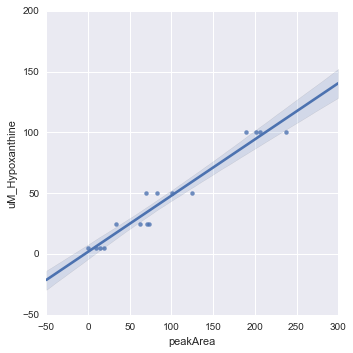

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn 
seaborn.lmplot( 'peakArea', 'uM_Hypoxanthine', standardCurve )

In [17]:


# %matplotlib inline 
# import matplotlib.pyplot as plt
# import matplotlib.figure

#plt.title('Standard Curves')
#plt.ylabel('mAU')
#plt.xlabel('uM_Hypoxanthine')
# plt.text(60, .025, slope,\ \sigma=15$') or plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05), ) # can add text to figure

#fig = plt.gcf()  #get current figure?
#fig.subplots_adjust()  #why did I do this again?

#plt.plot( x, y, 'bo', label='Standard Curves', markersize=5) #plots points of each standard curve individually (wi. different colors)
#plt.plot(x, slope*x + intercept, 'r', label='Fitted line') # plots regression line using already calculated values
#plt.grid(True)  
#plt.legend(loc=0)  # (loc=0)Makes legend go to optimal location (1 is top right, 2 is top left), .draggable(state=None/True?, use_blit=False, update='loc') ostensibly makes the legend draggable by the mouse but its not working :(

## TODO: make the plot larger so data isnt squished

# plots points of each standard curve individually (wi. different colors)

# y1= standardCurve.groupby(['curveRun']).get_group('1')
# y2= standardCurve.groupby(['curveRun']).get_group('2')
# y3= standardCurve.groupby(['curveRun']).get_group('3')
# y4= standardCurve.groupby(['curveRun']).get_group('4')

# print(y1)  # should print only one curve! whyyyyyyy??

# plt.plot( x, y1, 'bo', x, y2, 'go', x, y3, 'co', x, y4, 'y0',  label='Standard Curves', markersize=4) 


#####For practice, we will now read in some example data to simplify the process of using non-linear regression to compute kinetic constants.

In [18]:
# can open with file path ie. df = pandas.read_csv( '~/Documents/pnp/example_data.csv' )
# need ~/ for absolute directory, otherwise relative directory requires being in home directory
df = pandas.read_csv( 'PNPexample_data.csv' )

Now we will make a function that will apply the coefficient from the standard curve to convert the absorbance data into  Moles, as well as applying dilution factors and protein concentration to our product so that we get output that shows moles of product formed per unit of protein per second. <-- still a little confused here... confirm that taking A280s does not give mg/ml.

* Convert your rates from OD/min into M/min (molar per minute) using a standard curve. 

* Convert your enzyme concentration from mg/mL into M by dividing by the extinction coefficient of the protein and correcting for any dilution in your assay procedure.

> In this case, the extinction coefficient of PNP is 31650, and we diluted the mutants based on activity determined in earlier tests so that we could be assured that all Michaelis-Menten assumptions were true. #?? check which mm assumptions we are useing!

* Finally, divide the concentrations of product you observe (in units of M/s) by the enzyme concentration that you are testing (in units of M), to obtain rates in s$^{-1}$. Be sure to check your units!
* Convert your substrate concentrations into M as well
* Put them in a CSV table like the one in this repository called `example_data.csv`

In [19]:
# units!!! watch them you must. 
def make_MperS(df):

    ext_coef = 31650  #units of cm -1 M-1 (do I need to / 100 somewhere??) (obtained from protParam (reduced or non-reduced?))
    protein_conc = df['yield'] / ext_coef / df['dilution']  # real protein concentration in assay after dillution
    product_fin = (((df['productAbsorbance'] * slope) + intercept) / 1000000) / df['time'] / protein_conc # product formed in assay. Converted from absorbance units to concentration per time per protein_concentration.
   
    # account for background here? 
    return(product_fin)



def make_uM(df):
    sub_uM = df['substrateConcentration'] * 1000000
    return(sub_uM)


# lets test our function
print(df.groupby('sample').apply(make_MperS))



sample      
PNPH_I_1  0      5.539882
          1      7.206480
          2      5.868451
          3      3.418037
          4      1.838530
          5      1.323903
          6      0.156097
PNPH_I_2  7      9.395671
          8     12.240632
          9     10.273029
          10     6.241055
          11     4.273452
          12     2.467128
          13     0.789827
dtype: float64


## Make a plot of your data

Let's generate a plot of our data using the Python package `matplotlib` to see if it will fit the Michaelis-Menten equation.

First, let's import the packages we'll need and do some iPython magic to get the plots to display on this page.

Because we have our data in a `DataFrame`, we can use the built-in method `plot()` to make a quick scatter plot of our data and display it on screen.

(-0.001, 0.008)

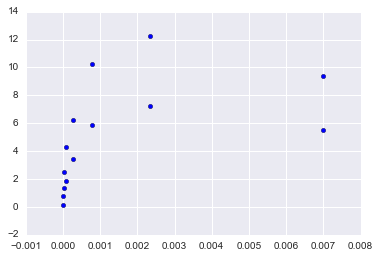

In [20]:
plt.scatter(df['substrateConcentration'], make_MperS(df))
plt.xlim(-0.001,.008)

# df.plot( x='substrateConcentration', y='productAbsorbance', kind='scatter' )


That looks like it will fit the Michaelis-Menten equation. Since we've converted all our values to use the same units, we can estimate $k_{cat}$ and $K_M$ from looking at the plot. Compareing out plot to this idealized Michaelis–Menten plot:
<img src="https://upload.wikimedia.org/wikipedia/commons/8/83/Michaelis_Menten_curve_2.svg" width="400">
I estimate our $k_{cat}$ to be about 8 sec$^{-1}$ and $K_M$, the substrate concentration where the rate it half its max, to be 5 M. 

## Fit your data to the Michaelis-Menten equation to determine $k_{cat}$ and $K_M$

Next, we'll use the Python module [SciPy](http://www.scipy.org) to perform a nonlinear least-squares optimization to determine the values of $k_{cat}$ and $K_M$ that fit our data best. First, we'll import SciPy and a couple of Numpy modules that we'll need later 

In [21]:
from scipy.optimize import curve_fit 
from numpy import diag, sqrt, std

and define the Michaelis-Menten equation in Python code 

In [22]:
def v( s, kcat, km ):
    return ( kcat * s ) / ( km + s )

We need to provide `curve_fit` with initial guesses at the parameters, which we estimated from the scatter plot above. The value for $k_{cat}$ (the maximum rate observed) appears to be about 200 min$^{-1}$, and the value for $K_M$ looks to be about 100. 

Put these in to a new tuple, called `p0`. 

In [23]:
#p0 = ( 650, 0.005 ) 
p0 = ( 8, 5 ) 

# you need to change these values to your guess for kcat and KM
# looking at the plot above, kcat ~ 200 and KM ~ 100, which are 
# very different from 650 and 0.005 

# auto-guess
p0 = ( make_MperS(df).max(), df['substrateConcentration'].mean() )

Now we're ready to use `curve_fit`. [The `curve_fit` documentation](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) indicates that the function returns two arrays, called `popt` (= parameter optimums) and `pcov` (= parameter covariance). From the documentation:

> **popt** : array
> Optimal values for the parameters so that the sum of the squared error of f(xdata, *popt) - ydata is minimized

> **pcov** : 2d array
> The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).

I recommend setting up your code to have the function return into two variables called `popt` and `pcov`.

In this next step, we'll perform the optimization and convert our one standard deviation errors into percent, which I find easier to make sense of for large data sets. 

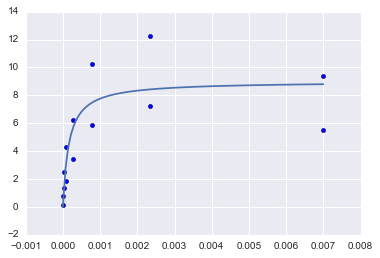

In [24]:
popt, pcov = curve_fit( v, df['substrateConcentration'], make_MperS(df), p0=p0 )  
perr = sqrt( diag( pcov ) )

kcat_km = popt[0] / popt[1]
kcat_km_err = sqrt( ( ( (perr[0])  / popt[0])**2) + ((  (perr[1])  / popt[1])**2) )

# calculate percent errors
for i in range( len( popt ) ):
    if not popt[ i ] or perr[ i ] > popt[ i ]:
        popt[ i ] = perr[ i ] = None 
    else:
        perr[ i ] = perr[ i ] / popt [ i ] * 100


plt.scatter(df['substrateConcentration'], make_MperS(df))
xdata = linspace(df.substrateConcentration.min(), df.substrateConcentration.max(), 100)
plt.xlim(-0.001,.008)
plt.plot( xdata, v( xdata, *popt ) ) 

Whew! That's it! Let's print out our results in a nice format, rounding numbers as necessary

In [25]:
results = { 
            
            'kcat': round( popt[0], 2 ),
            'kcat_std_err': round( perr[0], 2 ),

            'km': round( popt[1], 5 ),
            'km_std_err': perr[1].round(2),
            
            'kcat/km': round(kcat_km, 2),
            'kcat/km_err': kcat_km_err.round(2),
            
                }

print (pandas.Series( results ))



kcat                8.99000
kcat/km         56561.53000
kcat/km_err         0.55000
kcat_std_err       11.82000
km                  0.00016
km_std_err         53.64000
dtype: float64


OK, that is a nice simple example, but what if you have collected data on more than one sample and want to fit them all? 

## How to fit multiple samples

If you have multiple samples you'd like to fit at once, we can write a slightly more sophisticated program by wrapping up our previous code in a function and then using the `pandas.DataFrame.groupby()` method to apply it to all of our samples.

To write this function, all we need to consider is a Pandas `DataFrame` object, `df`, exactly as we already have. 

>error propegation is a bitch

In [26]:
import math



def try_michaelis_menten_fit( df, pretty=False ):
    # auto-guess
    p0 = ( make_MperS(df).max(), df['substrateConcentration'].mean() )
    # brush up on this
    popt, pcov = curve_fit( v, df['substrateConcentration'], make_MperS(df), p0=p0 )
    perr = sqrt( diag( pcov ) )
    
    #records kcat/km and kcat/km error *before* changing perr and popt
    kcat_km = popt[0] / popt[1]
    #error propegation
    kcat_km_err = (sqrt( ( ( (perr[0])  / popt[0])**2) + ((  (perr[1])  / popt[1])**2) ))

    kcat = ( popt[0] )
    kcat_std_err = ( perr[0] )
            
    km_uM = ( popt[1] * 1000000 )
    km_std_err = ( perr[1] *1000000)
        
    
#     # percent errors <--understand better
#     for i in range( len( popt ) ):
#         if not popt[ i ] or perr[ i ] > popt[ i ]:
#             popt[ i ] = perr[ i ] = None 
#         else:
#             perr[ i ] = perr[ i ] / popt [ i ] * 100

    if pretty:
        

        
        results = { 
            
            'kcat': kcat.round(2),
            'kcat_std_err': kcat_std_err.round(2),

            'km_uM': km_uM.round(2),
            'km_std_err': km_std_err.round(2),
            
            'kcat/km': kcat_km.round(2),
            'kcat/km_err': kcat_km_err.round(2),
            
        }

        return pandas.Series( results )
    else: 
        return popt, perr 
    

#             'kcat': '{:0.1f}'.format( popt[0] ),
#             'kcat_std_err': '{:0.1f}%'.format( perr[0] ),

#             'km': '{:0.4f}'.format( popt[1] ),
#             'km_std_err': '{:0.1f}%'.format( perr[1] ),
            
#             'kcat/km': '{:0.01f}'.format(kcat_km),
#             'kcat/km_err': '{:0.1f}%'.format(kcat_km_err),

All we've done here is take our previous code and wrap it in a function called `try_michaelis_menten_fit` that takes a DataFrame `df` and returns a Series.

Try running it on the example data and see that it returns the same values. 

In [27]:
example_df = pandas.read_csv( 'PNPexample_data.csv' )
try_michaelis_menten_fit( example_df, pretty=True )

kcat                8.99
kcat/km         56561.53
kcat/km_err         0.55
kcat_std_err        1.06
km_std_err         85.31
km_uM             159.03
dtype: float64

* Wrapping the code in the function `try_michaelis_menten_fit()` allows us to reuse the code on new `DataFrame`s. It's not very useful until we have some more samples in our data set. Look for some experimental data containing multiple samples in `PNP_Raw2Fittr.csv`. 
* Next, we need to apply this function to each set of mutants. To do this we use the `.groupby()` method to split our data up by sample name.
* Finally, we apply the `try_michaelis_menten_fit()` function that we just wrote to all of our groups of data and then write out the result of that function to the `fits_pretty_output.csv` file. 

In [28]:
df = pandas.read_csv( 'PNP_Raw2Fittr.csv' ) 
grouped = df.groupby( 'sample' )
fits = grouped.apply( try_michaelis_menten_fit, pretty=True ) 
fits.to_csv( 'fits_pretty_output.csv' )
print( fits ) 

# here, you just have to apply the function to the groupby object 


# write code that prints both mutant name and number.

                kcat       kcat/km   kcat/km_err  kcat_std_err  km_std_err  \
sample                                                                       
0) S33A_I       0.23  1.349900e+02  3.400000e-01          0.03      540.75   
0) S33A_P       0.06  2.816500e+02  4.500000e-01          0.01       98.04   
1) H64A_I       0.34  1.443600e+02  1.500000e-01          0.02      329.14   
1) H64A_P       0.16  1.063600e+02  6.500000e-01          0.03      957.56   
10) V217A_I    24.26  1.946608e+04  1.700000e-01          1.31      201.46   
10) V217A_P    24.26  1.555626e+04  3.800000e-01          2.47      563.08   
11) M219A_I     2.13  4.914200e+02  1.800000e-01          0.17      710.78   
11) M219A_P     1.55  3.264390e+03  1.600000e-01          0.05       71.87   
12) S220_I      2.31  1.107260e+03  2.100000e-01          0.18      416.58   
12) S220_P      0.56  6.135400e+02  3.700000e-01          0.05      325.38   
13) T242A_I_2   5.42  9.379600e+02  5.700000e-01          1.46  

In [29]:
! mkdir plots # you need to create this directory only once 

# make a function to give 10% of max substrate on either side of x-axis of plots
def xPercent_sub(df):
    ten_percent = (df['substrateConcentration'].max() / 10 )
    return(ten_percent)


mkdir: plots: File exists


Now to plot our curves we will need to use a for loop to iterate over each of our groups, plotting the corresponding data and curves. 

In [30]:
from numpy import linspace 

# iteratively plot plots in dataset 
plots = [ ] 
for name, df in grouped: 
    
    plt.figure()
    plt.scatter( df['substrateConcentration'], make_MperS(df))
    plt.title(name)
    plt.xlabel( 'Substrate concentration (M)' )
    plt.ylabel( 'Product formation (S-1)' ) 
    # do I really need this? keeps line from going off the page...
    xdata = linspace(df.substrateConcentration.min(), df.substrateConcentration.max(), 100)
    # try to keep your variable names short!! 
    popt, perr = try_michaelis_menten_fit( df ) 
    plt.plot( xdata, v( xdata, *popt ) ) 
    # sizes figure to give 10% space on either side of data
    plt.xlim((df.substrateConcentration.min() - xPercent_sub(df)),(df.substrateConcentration.max() + xPercent_sub(df)))
    plt.savefig( 'plots/{}.pdf'.format( name ) )
    
    plt.close()

['PNPH_P_3']
[ 0.945]


NameError: name 'column_labels' is not defined

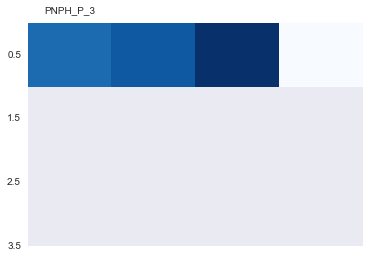

In [31]:
# column_labels = list(df['sample'])
# row_labels = 'Mutant expression'
# data = df['yield']
# fig, ax = plt.subplots()
# heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# # put the major ticks at the middle of each cell
# ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
# ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# # want a more natural, table-like display
# ax.invert_yaxis()
# ax.xaxis.tick_top()

# ax.set_xticklabels(row_labels, minor=False)
# ax.set_yticklabels(column_labels, minor=False)
# plt.show()

print(df['sample'].unique())
print(df['yield'].unique())

import matplotlib.pyplot as plt
import numpy as np


# can also be row_labels = unique( df['sample'] )
row_labels = df['sample'].unique()

data = np.random.rand(1,4)
# data = df['yield'].unique()
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

In [209]:
# what does Kcat tell us
# what does km tell us
# what does kcat/km tell us